# RobPer Periodograms

Media de periodicidades: 108.85 minutos
Mediana de periodicidades: 95.00 minutos
Modas de periodicidades: 95.00 minutos
Desviación estándar: 56.77 minutos
Periodicidad mínima: 1.00 minutos
Periodicidad máxima: 202.00 minutos
Intervalo de confianza de la media: (102.86238112551494, 114.83302117333564)
Intervalo de confianza de la mediana: [95. 96.]


/home/wattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/wattie/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


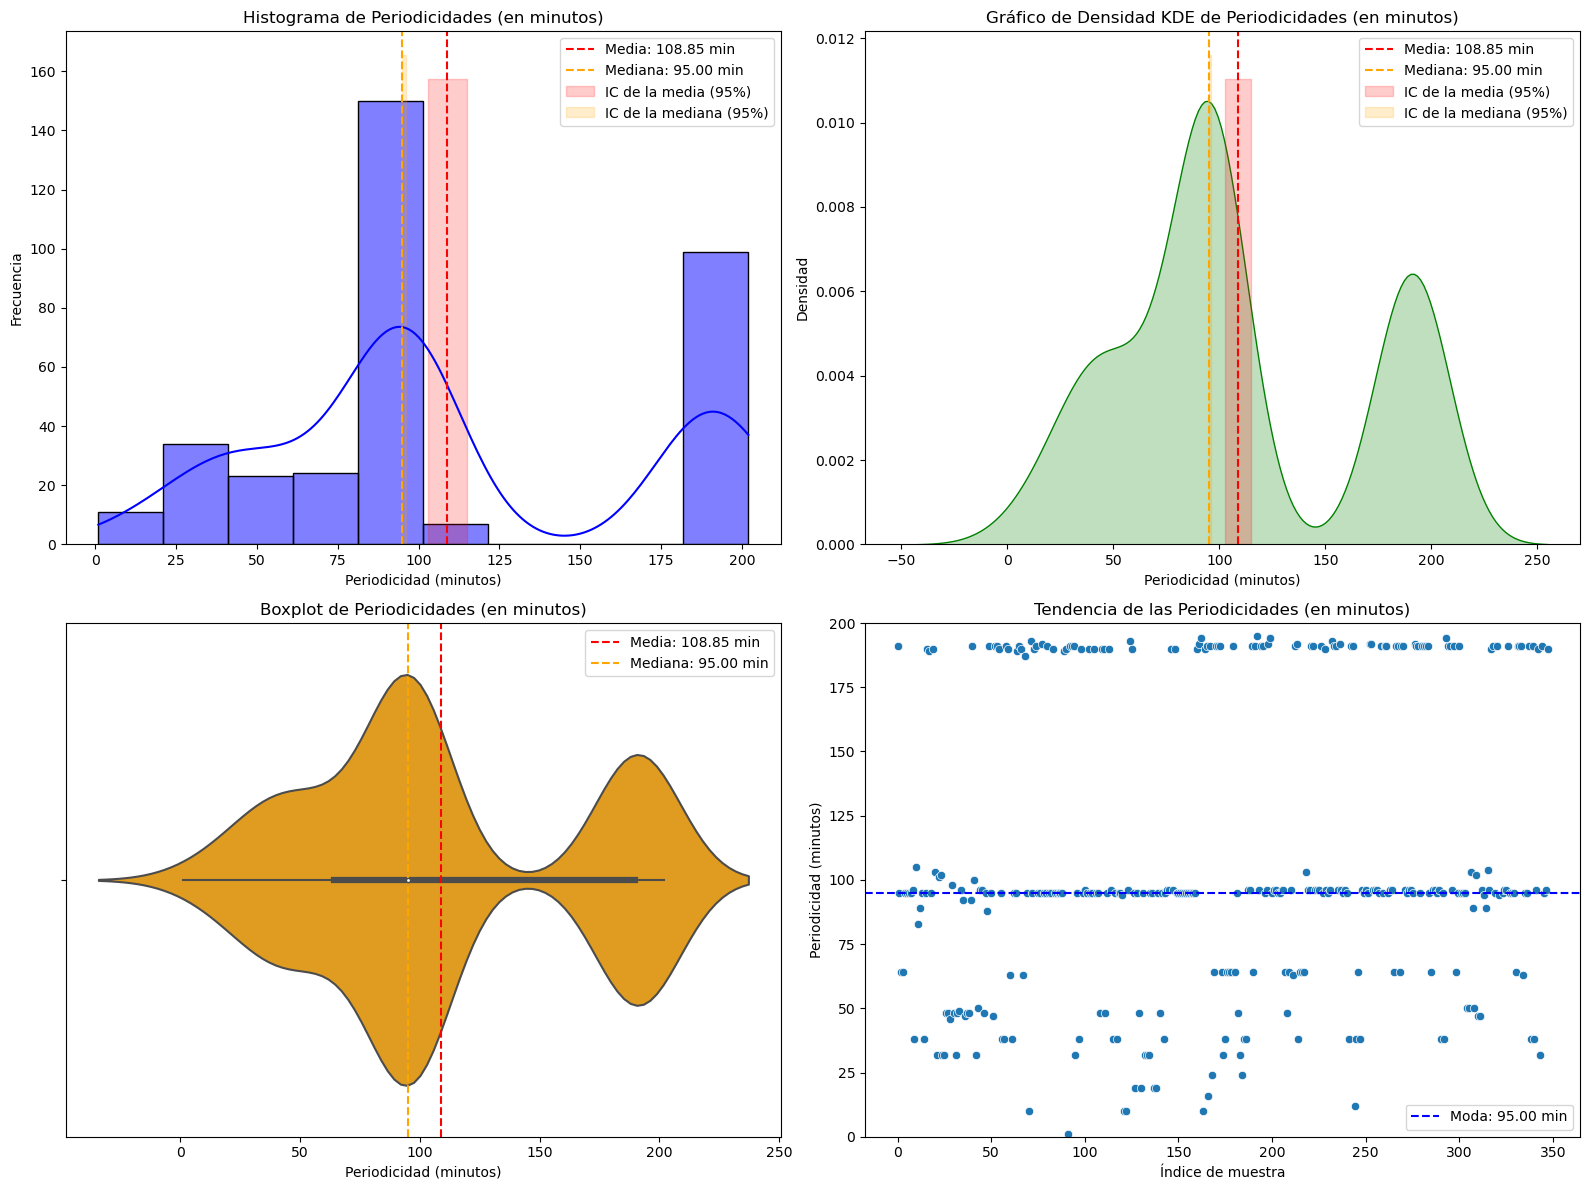

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Paso 1: Leer los datos del archivo periodicidades.txt
file_path = 'resultados_periodogramas_1_700periodos_modelsine.txt'  # Cambia esto por la ruta correcta de tu archivo

periods_days = pd.read_csv(file_path, header=None, names=['period_days'])

# Paso 2: Convertir las periodicidades de días a minutos
periods_minutes = periods_days['period_days']  # * 24 * 60  # 1 día = 1440 minutos
periods_minutes = periods_minutes.dropna()  # Filtrar valores NaN
periods_days['period_minutes'] = periods_minutes

# Paso 3: Cálculo de estadísticas básicas
mean_minutes = periods_minutes.mean()
median_minutes = periods_minutes.median()
moda_minutes = periods_minutes.mode()
std_minutes = periods_minutes.std()
min_minutes = periods_minutes.min()
max_minutes = periods_minutes.max()

# Intervalo de confianza de la media usando la t-distribución (95%)
conf_interval_mean = stats.t.interval(0.95, df=len(periods_minutes)-1, loc=mean_minutes, scale=std_minutes / np.sqrt(len(periods_minutes)))

# Intervalo de confianza de la mediana usando bootstrap
n_bootstraps = 10000
bootstrapped_medians = np.median(np.random.choice(periods_minutes, (n_bootstraps, len(periods_minutes))), axis=1)
conf_interval_median = np.percentile(bootstrapped_medians, [2.5, 97.5])

# Imprimir los resultados
print(f"Media de periodicidades: {mean_minutes:.2f} minutos")
print(f"Mediana de periodicidades: {median_minutes:.2f} minutos")
modas_formateadas = ', '.join([f"{moda:.2f}" for moda in moda_minutes])
print(f"Modas de periodicidades: {modas_formateadas} minutos")
print(f"Desviación estándar: {std_minutes:.2f} minutos")
print(f"Periodicidad mínima: {min_minutes:.2f} minutos")
print(f"Periodicidad máxima: {max_minutes:.2f} minutos")
print(f"Intervalo de confianza de la media: {conf_interval_mean}")
print(f"Intervalo de confianza de la mediana: {conf_interval_median}")

# Paso 4: Generación de gráficos

# Crear una figura con varios subplots
plt.figure(figsize=(16, 12))

# Gráfico 1: Histograma
plt.subplot(2, 2, 1)
sns.histplot(periods_minutes, bins='auto', kde=True, color='blue')
plt.axvline(mean_minutes, color='red', linestyle='--', label=f'Media: {mean_minutes:.2f} min')
plt.axvline(median_minutes, color='orange', linestyle='--', label=f'Mediana: {median_minutes:.2f} min')
plt.fill_betweenx([0, plt.ylim()[1]], conf_interval_mean[0], conf_interval_mean[1], color='red', alpha=0.2, label='IC de la media (95%)')
plt.fill_betweenx([0, plt.ylim()[1]], conf_interval_median[0], conf_interval_median[1], color='orange', alpha=0.2, label='IC de la mediana (95%)')
plt.title('Histograma de Periodicidades (en minutos)')
plt.xlabel('Periodicidad (minutos)')
plt.ylabel('Frecuencia')
plt.legend()

# Gráfico 2: KDE (Kernel Density Estimate)
plt.subplot(2, 2, 2)
sns.kdeplot(periods_minutes, fill=True, color='green')
plt.axvline(mean_minutes, color='red', linestyle='--', label=f'Media: {mean_minutes:.2f} min')
plt.axvline(median_minutes, color='orange', linestyle='--', label=f'Mediana: {median_minutes:.2f} min')
plt.fill_betweenx([0, plt.ylim()[1]], conf_interval_mean[0], conf_interval_mean[1], color='red', alpha=0.2, label='IC de la media (95%)')
plt.fill_betweenx([0, plt.ylim()[1]], conf_interval_median[0], conf_interval_median[1], color='orange', alpha=0.2, label='IC de la mediana (95%)')
plt.title('Gráfico de Densidad KDE de Periodicidades (en minutos)')
plt.xlabel('Periodicidad (minutos)')
plt.ylabel('Densidad')
plt.legend()

# Gráfico 3: Boxplot
plt.subplot(2, 2, 3)
sns.violinplot(x=periods_minutes, color='orange')
plt.axvline(mean_minutes, color='red', linestyle='--', label=f'Media: {mean_minutes:.2f} min')
plt.axvline(median_minutes, color='orange', linestyle='--', label=f'Mediana: {median_minutes:.2f} min')
plt.title('Boxplot de Periodicidades (en minutos)')
plt.xlabel('Periodicidad (minutos)')
plt.legend()

# Gráfico 4: Gráfico de dispersión (scatter plot) con tendencia
# Calcular los cuartiles
Q1 = periods_minutes.quantile(0.25)
Q3 = periods_minutes.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites inferior y superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los outliers
periods_minutes_sin_outliers = periods_minutes[(periods_minutes >= limite_inferior) & (periods_minutes <= limite_superior)]

# Graficar la tendencia sin outliers
plt.subplot(2, 2, 4)
# sns.regplot(x=np.arange(len(periods_minutes_sin_outliers)), y=periods_minutes_sin_outliers, scatter=True, line_kws={"color": "red"})
sns.scatterplot(x=np.arange(len(periods_minutes_sin_outliers)), y=periods_minutes_sin_outliers) #, scatter=True) #, line_kws={"color": "red"})
plt.title('Tendencia de las Periodicidades (en minutos)')
plt.xlabel('Índice de muestra')
plt.ylabel('Periodicidad (minutos)')
plt.ylim(0, 200)  # Limitar el eje y a 200 minutos
plt.legend()

# Agregar líneas horizontales para cada moda
for moda in moda_minutes:
    plt.axhline(y=moda, color='blue', linestyle='--', label=f'Moda: {moda:.2f} min')

# Evitar etiquetas duplicadas en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

# Ajustar los gráficos
plt.tight_layout()
plt.savefig("images/robper_periodogram_sample_1.png", format='png', dpi=300)
plt.show()


# RobPer Cluster

/home/wattie/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/wattie/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/wattie/anaconda3/lib/python3.11/site-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Cluster 0:
  Media: 47.68
  Intervalo de Confianza al 95%: 47.66 a 47.70

Cluster 1:
  Media: 190.66
  Intervalo de Confianza al 95%: 190.36 a 190.97

Cluster 2:
  Media: 95.42
  Intervalo de Confianza al 95%: 95.34 a 95.50

Cluster 3:
  Media: 29.27
  Intervalo de Confianza al 95%: 26.18 a 32.36

Cluster 4:
  Media: 63.57
  Intervalo de Confianza al 95%: nan a nan



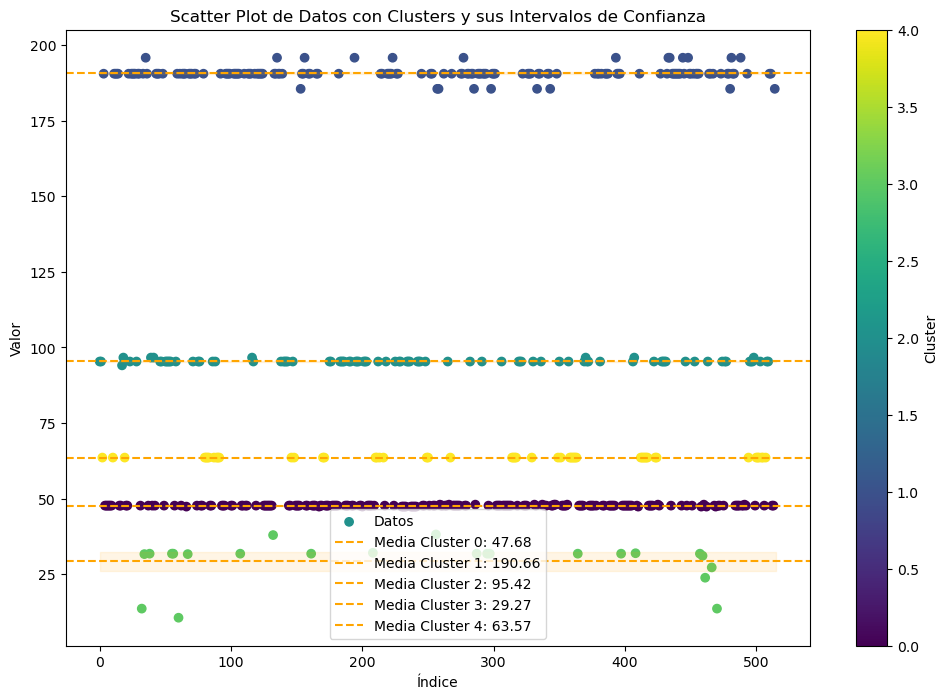

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans

# Paso 1: Leer los datos desde el archivo que contiene los valores
file_path = 'resultados_periodogramas_1_700_lombscargle.txt'  # Cambia esto por la ruta correcta de tu archivo

# Leer los datos
all_data = pd.read_csv(file_path, header=None, names=['values'], na_values=['NA'])

# Paso 2: Limpiar los datos
# Eliminar filas con NaN
all_data.dropna(inplace=True)

# Paso 3: Aplicar KMeans
n_clusters = 5  # Ajusta esto según tus necesidades
kmeans = KMeans(n_clusters=n_clusters)
all_data['cluster'] = kmeans.fit_predict(all_data[['values']])

# Paso 4: Calcular la media y el intervalo de confianza para cada cluster
intervals = []
for cluster in range(n_clusters):
    cluster_data = all_data[all_data['cluster'] == cluster]['values']
    mean = cluster_data.mean()
    std = cluster_data.std()
    n = len(cluster_data)
    
    # Calcular el intervalo de confianza al 95%
    conf_int = stats.t.interval(0.95, df=n-1, loc=mean, scale=std/np.sqrt(n))
    intervals.append((mean, conf_int))

    # Imprimir la media y el intervalo de confianza
    print(f'Cluster {cluster}:')
    print(f'  Media: {mean:.2f}')
    print(f'  Intervalo de Confianza al 95%: {conf_int[0]:.2f} a {conf_int[1]:.2f}\n')

# Paso 5: Crear el scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(all_data.index, all_data['values'], c=all_data['cluster'], cmap='viridis', label='Datos')
plt.colorbar(label='Cluster')

# Graficar las medias y sus intervalos de confianza
for i, (mean, conf_int) in enumerate(intervals):
    plt.axhline(y=mean, color='orange', linestyle='--', label=f'Media Cluster {i}: {mean:.2f}')
    plt.fill_betweenx([conf_int[0], conf_int[1]], 0, len(all_data), color='orange', alpha=0.1)

plt.title('Scatter Plot de Datos con Clusters y sus Intervalos de Confianza')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.savefig("images/lombScargle_cluster_sample_1.png", format='png', dpi=300)
plt.show()

